In [1]:
import tensorflow as tf

# Linear Regression

Matplotlib is building the font cache; this may take a moment.


(0.0, 6.0, 0.0, 20.0)

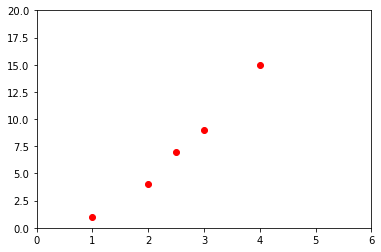

In [3]:
import matplotlib.pyplot as plt
import numpy as np


x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

## Dados

In [5]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived') # Tira o y do treino
y_eval = dfeval.pop('survived') # Tira o y do teste

In [6]:
# Formato
dftrain.shape

(627, 9)

## Gráficos básicos

<AxesSubplot:>

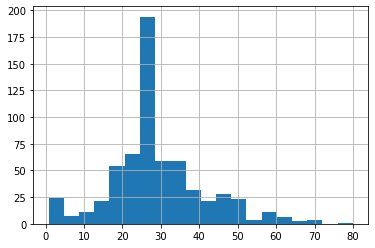

In [10]:
# Base idade
dftrain.age.hist(bins=20)

<AxesSubplot:>

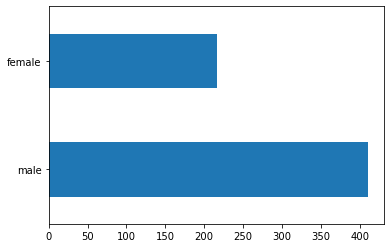

In [15]:
# Número de pessoas por sexo
dftrain['sex'].value_counts().plot(kind="barh")

<AxesSubplot:>

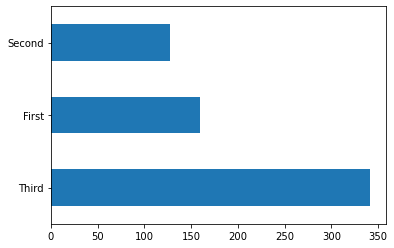

In [14]:
# Número de pessoas por classe
dftrain['class'].value_counts().plot(kind="barh")

Text(0.5, 0, '% survive')

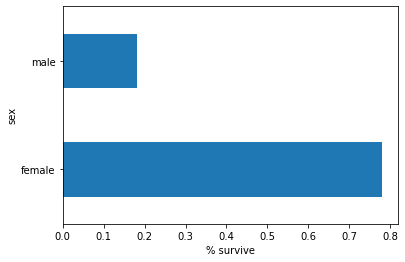

In [19]:
# Sobrevivente por sexo
pd.concat([dftrain, y_train], axis=1).groupby("sex").survived.mean().plot(kind="barh").set_xlabel('% survive')

## Separando os dados

Dado que temos parâmetros que não são numericos, transformaremos eles em númericos.

In [6]:
Colunas_Categoricas = ["sex", "n_siblings_spouses", "parch", 'class', 'deck',
                       'embark_town', 'alone']
Colunas_numericas = ["age", "fare"]

Colunas_parametros = list()

for nome_parametro in Colunas_Categoricas:
    vocabulario = dftrain[nome_parametro].unique() # Tira de dentro de cada coluna os valores únicos
    
    # Adiciona na lista Colunas_parametros o TENSORFLOW que é a junção do vocabulario e do nome_parametro
    Colunas_parametros.append(tf.feature_column.categorical_column_with_vocabulary_list(nome_parametro,vocabulario))
    
for nome_parametro in Colunas_numericas:
    # Adiciona na lista Colunas_parametros o TENSORFLOW que é o nome_parametro
    Colunas_parametros.append(tf.feature_column.numeric_column(nome_parametro,dtype=tf.float32))


print(Colunas_parametros)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

 Documentação:
 https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list?version=stable

## Treinamento

Os dados serão calculados em um lote (batch) de 32, escolhidos aleátoriamente, e vamos apresentar-los dado um certo número de "epochs", que consiste em quantas vezes esse lote vai ser calculado.

Como os dados estão em dataFrame do pando, temos que passar para dados do Tensorflow (tf.data.Dataset). Para isso, precisamos de uma função de entrada.

A função abaixo é direta da documentação do TensoFlow
(https://www.tensorflow.org/tutorials/estimator/linear).

In [13]:
def faz_input(dado_em_df, rotulos_df, num_epochs=10, shuffle=True, tam_lote=32):
    def funcao_entrada(): # Função interna que será devolvida
        ds = tf.data.Dataset.from_tensor_slices((dict(dado_em_df), rotulos_df)) # Cria um objeto TensoFlow com os rotulos
        
        if shuffle: # Se embaralhar for verdadeiro
            ds = ds.shuffle(1000) # Reogarniza os dados aleatóriamente
        
        ds = ds.batch(tam_lote).repeat(num_epochs) # dividi os dados em lotes de 23 e repete a cada num de epochs
        return ds # Retorna os dados em lotes

    return funcao_entrada # retorna a própria função interna

treino_input_fn = faz_input(dftrain, y_train) # Dados já em lote
eval_input_fn = faz_input(dfeval, y_eval, num_epochs=1, shuffle=False)

## Criando o modelo

In [10]:
linear_est = tf.estimator.LinearClassifier(feature_columns=Colunas_parametros)
# Um estimador linear é cridado com as colunas encontradas em "SEPARANDO OS DADOS"

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\RIOPHO~1\\AppData\\Local\\Temp\\tmp4znuq6c9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Treinando o modelo
Só precisa passar os dados para .train

In [16]:
linear_est.train(treino_input_fn) # Treina
resultado = linear_est.evaluate(eval_input_fn) # Devolve todos as métricas usando os dados de teste

clear_output() # limpa a tela
print(resultado['accuracy'])

0.78409094


O modelo tem acuracia de 78% e pode mudar a cada nova formulação dado que os dados são embaralhados aleatoriamente.

Podemos agora prever as chances de sobrevivência das pessoas com .predict


In [18]:
resultado = list(linear_est.predict(eval_input_fn))
print(resultado[1]['probabilities'][1]) # printa a probabilidade de sobreviver da pessoa 0

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\RIOPHO~1\AppData\Local\Temp\tmp4znuq6c9\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4020985


#### Plotando em gráfico

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\RIOPHO~1\AppData\Local\Temp\tmp4znuq6c9\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

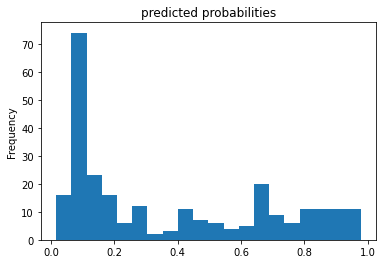

In [19]:
dict_predict = list(linear_est.predict(eval_input_fn))
probabilidade = pd.Series([pred['probabilities'][1] for pred in dict_predict])

probabilidade.plot(kind='hist', bins=20, title='predicted probabilities')

O gráfico mostra que o algoritmo previu mais 70% com baixas chances de sobreviver

# Classificação

O dado separa flores em 3 espécies. 

In [3]:
CSV_NOME_COLUNAS = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
ESPECIES= ['Setosa', 'Versicolor', 'Virginica']

In [4]:
caminho_treino = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
caminho_teste = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

treino = pd.read_csv(caminho_treino, names=CSV_NOME_COLUNAS, header=0)
teste = pd.read_csv(caminho_teste, names=CSV_NOME_COLUNAS, header=0)

#### Tiramos a coluna de especie e usamos o resto no treino

In [13]:
treino.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [14]:
treino_y = treino.pop("Species")
teste_y = teste.pop("Species") # teste_y são os labels
treino.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


## Função input - passando os dados de DataFrame pandas para TensorFlow

In [5]:
def input_fn(dado_em_df, rotulos_df, training=True, batch_size=256):
    # Converte para dataset tensorflow
    dataset = tf.data.Dataset.from_tensor_slices((dict(dado_em_df), rotulos_df))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

## Passando as colunas parâmetros

In [6]:
# Essas colunas dirão como usar o input.
Colunas_parametros = []
for chave in treino.keys():
    Colunas_parametros.append(tf.feature_column.numeric_column(key=chave))
print(Colunas_parametros)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Species', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Construindo o modelo